In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [36]:
train = pd.read_csv('../titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


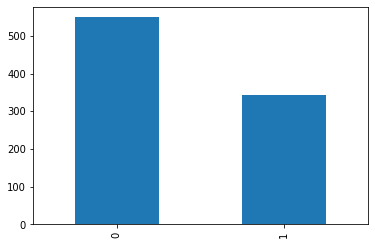

In [37]:
train.Survived.value_counts().plot.bar()

number of ppl survived smaller than the number of ppl not survived

# feature extraction

In [40]:
def name1(name):
    return name.split(", ")[0]
train['name1'] = train.Name.apply(lambda x: name1(x))
train['name1_len'] = train.name1.apply(lambda x: len(x))

def name_type(name):
    name_temp = name.split(", ")[1]
    return name_temp.split(". ")[0]
train['name_type'] = train.Name.apply(lambda x: name_type(x))
train['name_type_len'] = train.name_type.apply(lambda x: len(x))

def name2(name):
    name_temp = name.split(", ")[1]
    name_temp1 = name_temp.split('. ')[1]
    return name_temp1.split(' (')[0]
train['name2'] = train['Name'].apply(lambda x: name2(x))

def name2_len(name2):
    return len(name2.split(" "))
train['name2_len'] = train['name2'].apply(lambda x: name2_len(x))

def married(name):
    name_len = len(name.split(' ('))
    if name_len==1:
        return False
    else:
        return True
train['married'] = train['Name'].apply(lambda x: married(x))

def real_name(name):
    name_temp = name.split(", ")[1]
    name_temp1 = name_temp.split('. ')[1]
    return name_temp1.split(' (')[-1].replace(")", "")
train['real_name'] = train['Name'].apply(lambda x: real_name(x))

def real_name_len(real_name):
    return len(real_name.split(" "))
train['real_name_len'] = train['real_name'].apply(lambda x: real_name_len(x))

def ticket_no(ticket):
    try:
        value = int(ticket.split(" ")[-1])
    except:
        value = 0
    return value
train['ticket_no'] = train.Ticket.apply(lambda x: ticket_no(x))

def ticket_type(ticket):
    if len(ticket.split(" "))==1:
        try:
            remove_part = str(int(ticket))
        except:
            remove_part = ''
        typ = ticket.replace(remove_part, '')
    else:
         typ = ticket.replace(ticket.split(" ")[-1], '')
    return typ
train['ticket_type'] = train.Ticket.apply(lambda x: ticket_type(x))

# train.Age.fillna('noAge', inplace=True)
# train['Cabin'].fillna('nocabin', inplace=True)
train.Fare.fillna(train.Fare.mean(), inplace=True)

# data visualization

In [15]:
train.name_type.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Ms                1
Sir               1
Lady              1
Capt              1
Jonkheer          1
Mme               1
the Countess      1
Name: name_type, dtype: int64

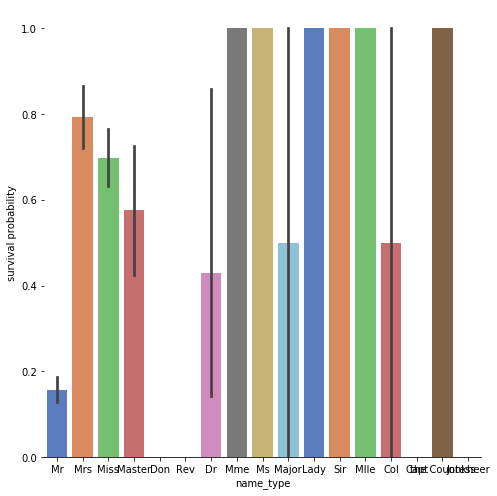

In [16]:
g = sns.factorplot(x="name_type", y="Survived", data=train,kind="bar", size=7, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Mrs, Miss, Lady, Sir, Mme have higher survival prob while Mr has really low chance to chance to survived

In [17]:
train.married.value_counts()

False    748
True     143
Name: married, dtype: int64

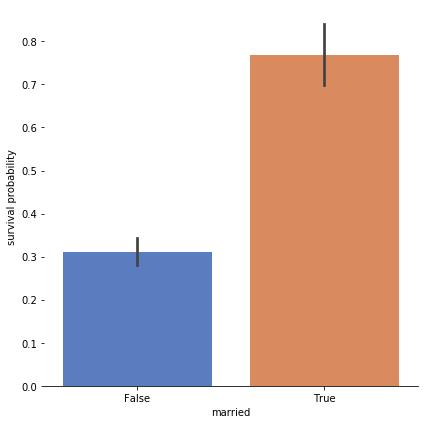

In [19]:
g = sns.factorplot(x="married", y="Survived", data=train,kind="bar", size=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

married ppl have higher chance to survived while single ppl have lower chance

In [20]:
train.ticket_type.value_counts()

                661
PC               60
C.A.             27
STON/O 2.        12
A/5              10
W./C.             9
SOTON/O.Q.        8
CA.               8
A/5.              7
SOTON/OQ          7
STON/O2.          6
CA                6
C                 5
S.O.C.            5
F.C.C.            5
SC/PARIS          5
SC/Paris          4
LINE              4
PP                3
S.O./P.P.         3
A/4.              3
A/4               3
A.5.              2
S.C./PARIS        2
SOTON/O2          2
A./5.             2
SC/AH             2
WE/P              2
P/PP              2
SC                1
S.W./PP           1
S.P.              1
F.C.              1
W/C               1
A4.               1
SO/C              1
SW/PP             1
SC/AH Basle       1
A/S               1
W.E.P.            1
C.A./SOTON        1
SCO/W             1
S.C./A.4.         1
Fa                1
S.O.P.            1
Name: ticket_type, dtype: int64

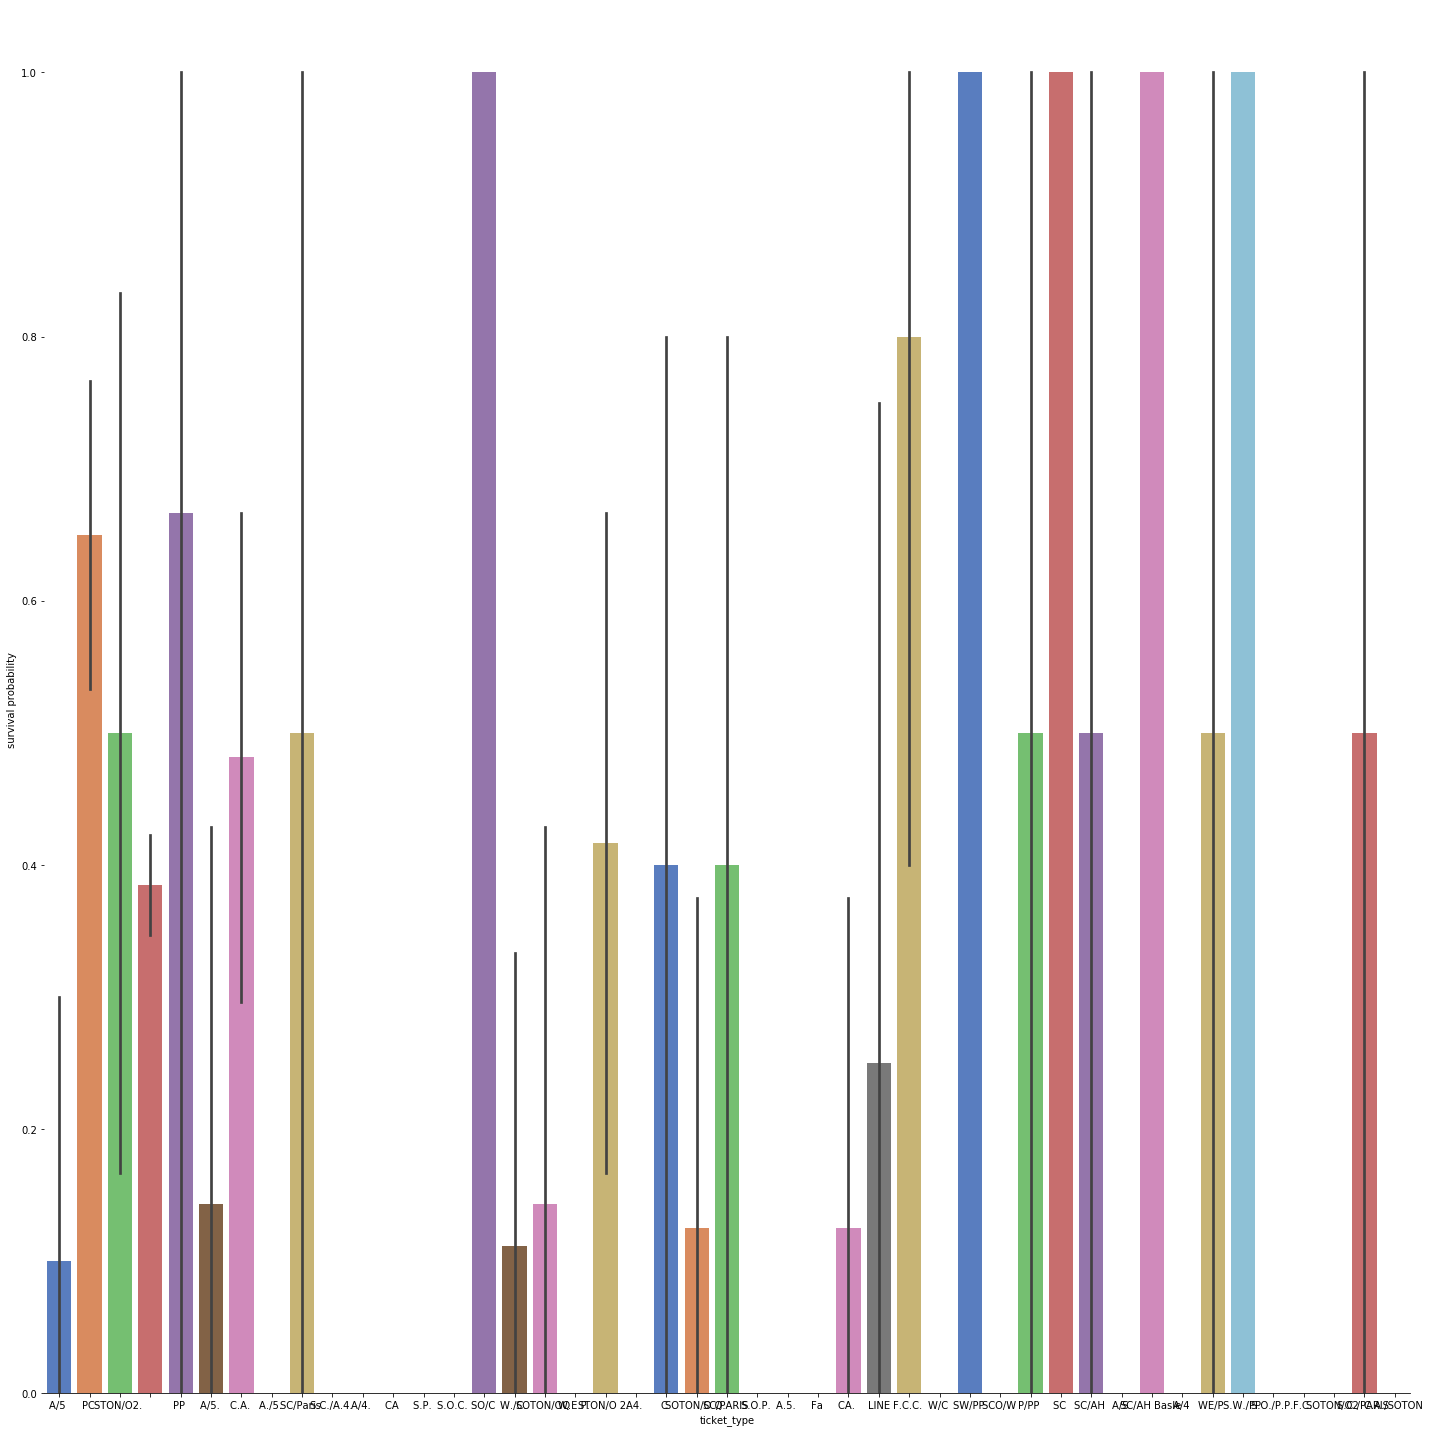

In [24]:
g = sns.factorplot(x="ticket_type", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

PC has higher chance to survive while nan value has lower chance to survive

In [25]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

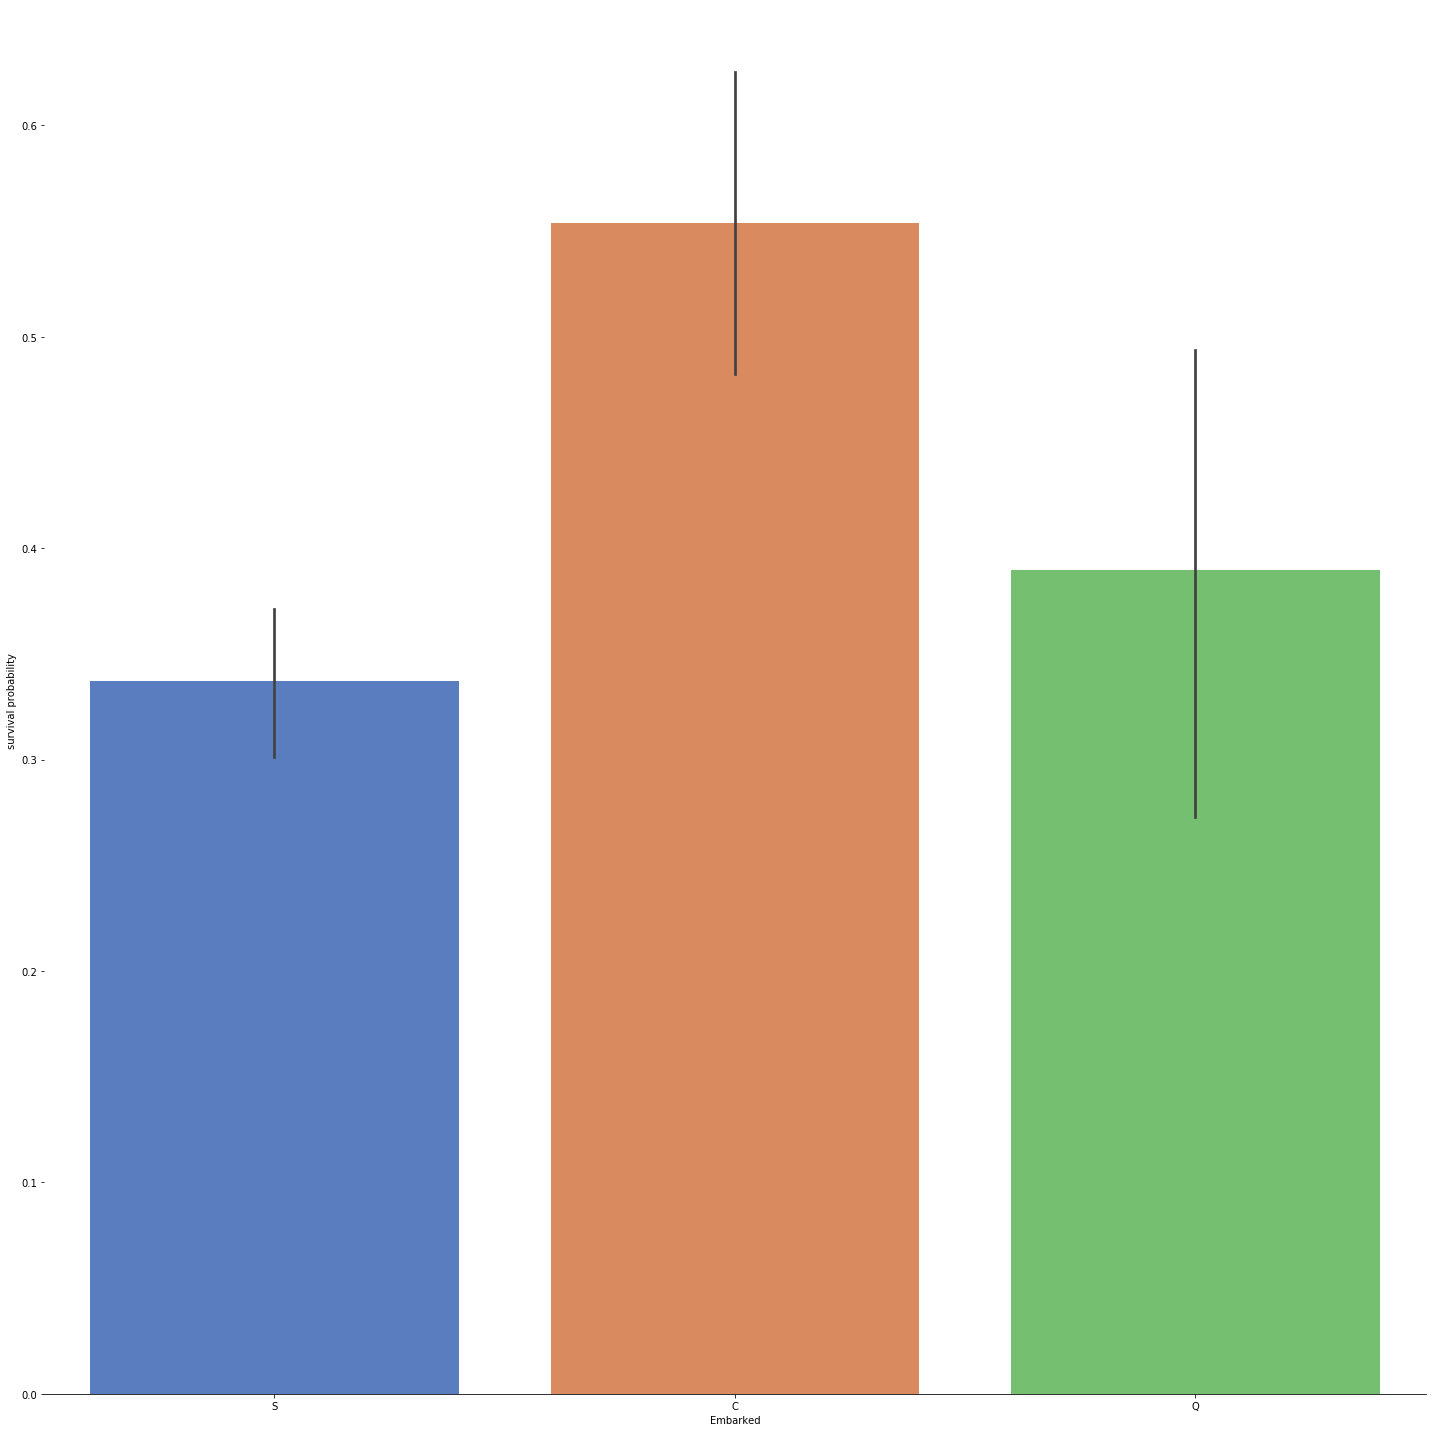

In [26]:
g = sns.factorplot(x="Embarked", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

C has higher chance to survive while S and Q have lower chance to survive

In [28]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

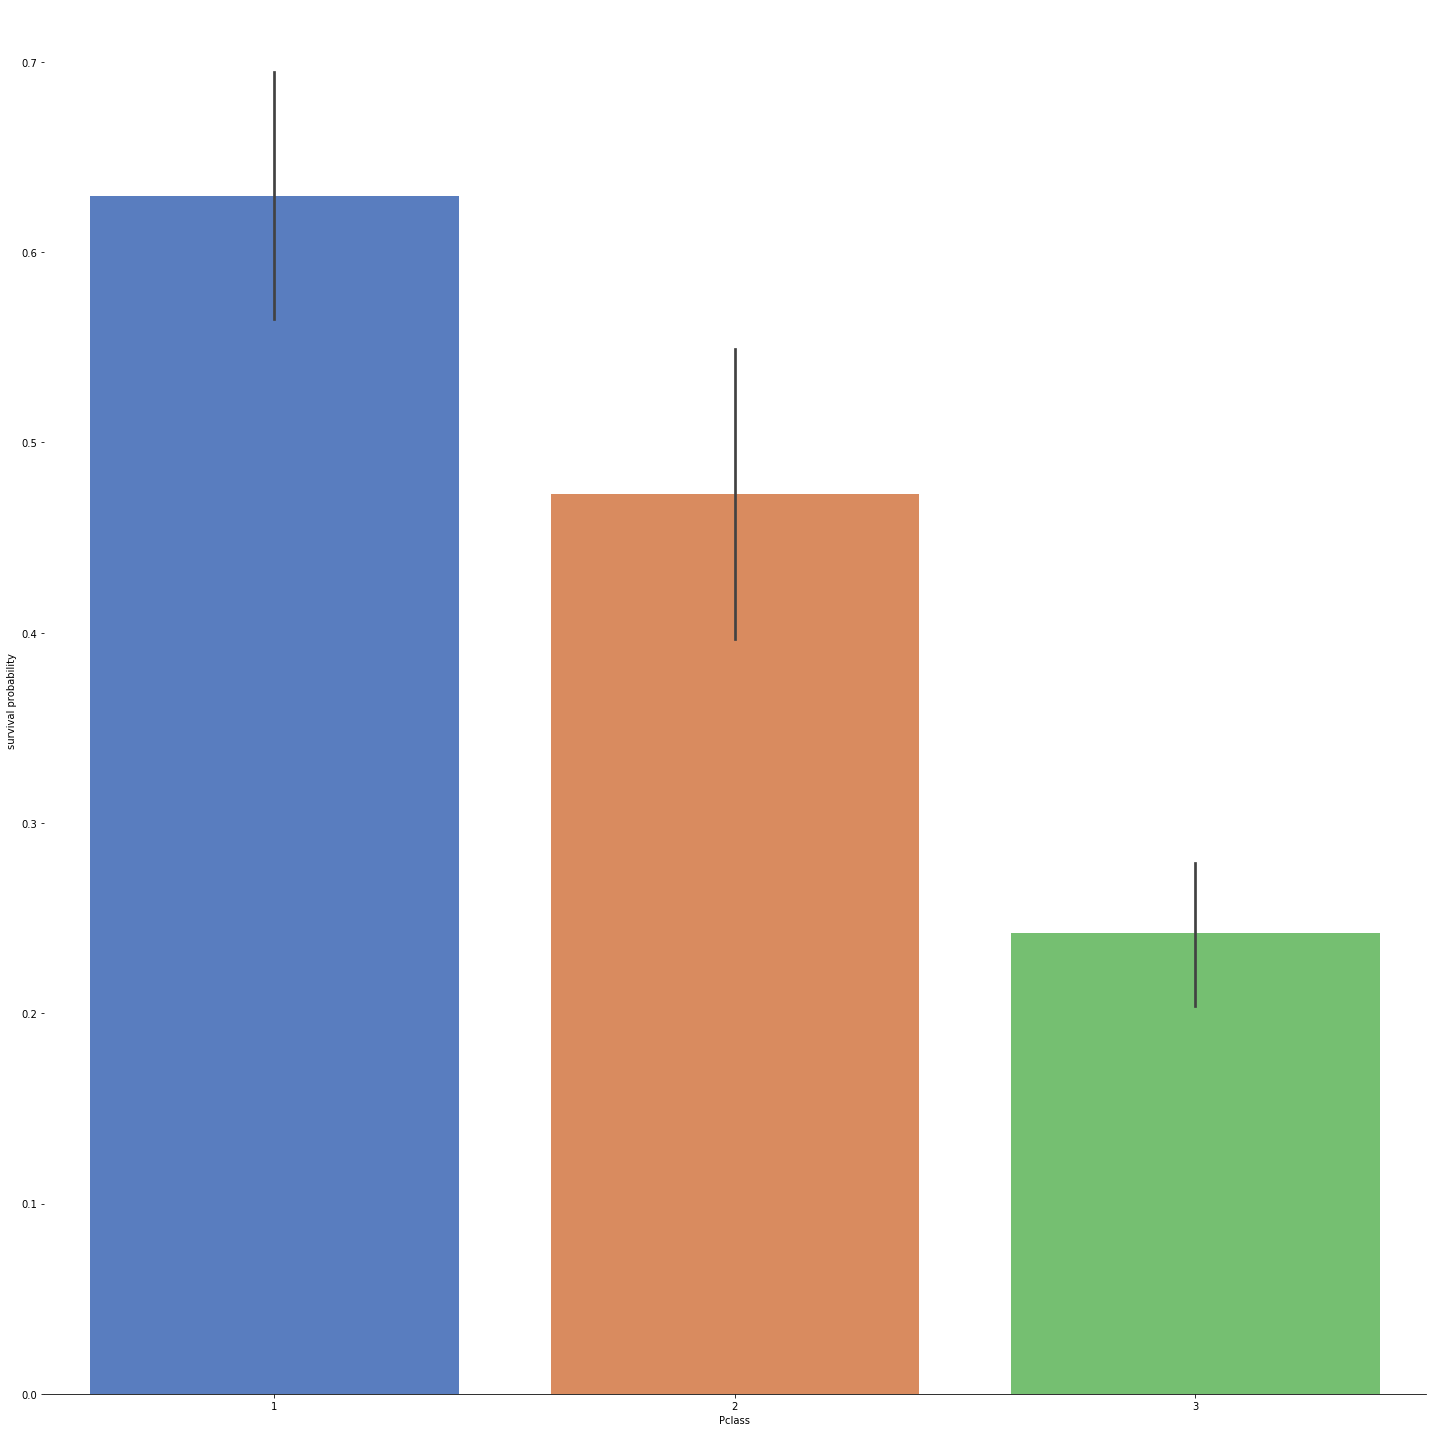

In [29]:
g = sns.factorplot(x="Pclass", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Pclass=1 has higher chance to survive

In [31]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

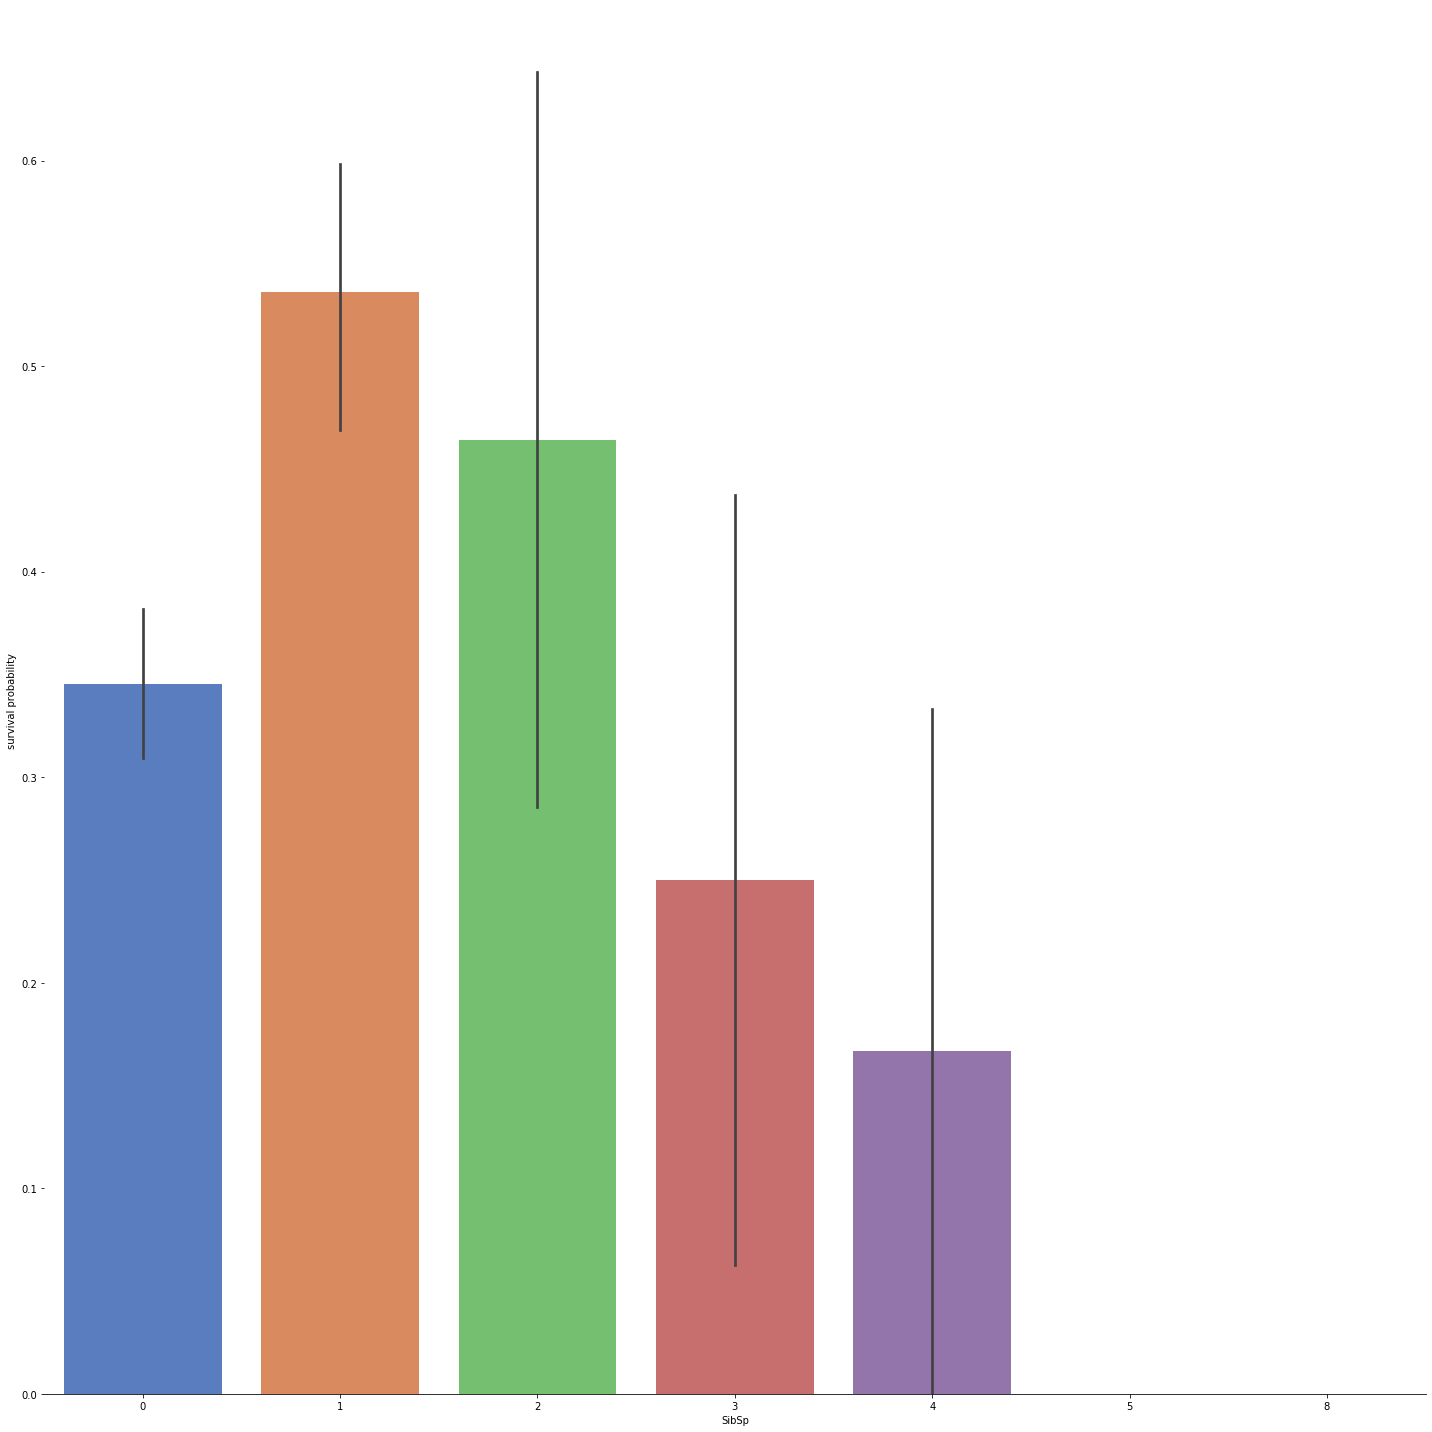

In [32]:
g = sns.factorplot(x="SibSp", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

SibSp=1 has higher chance to survive

In [33]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

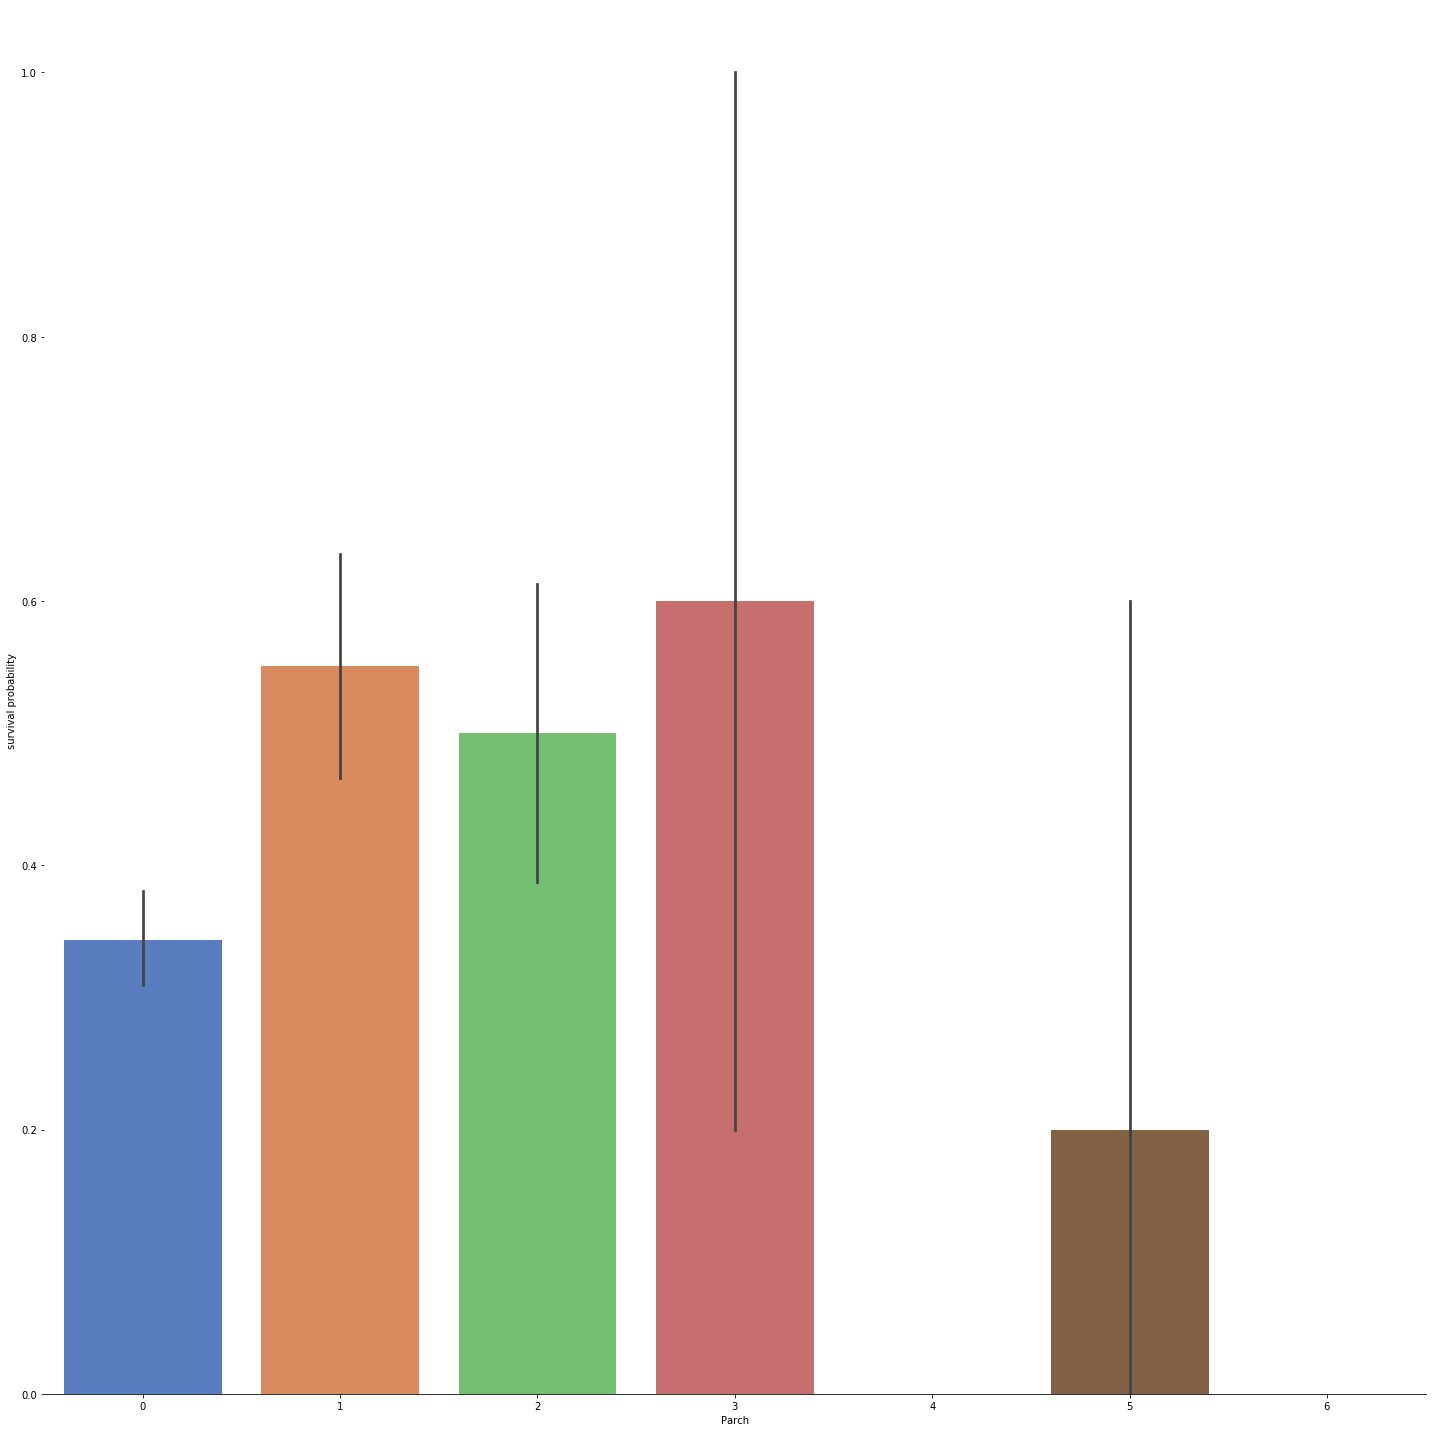

In [34]:
g = sns.factorplot(x="Parch", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Parch=0 has lower chance to survive

In [44]:
train.name_type_len.value_counts()

2     525
4     186
3     136
6      40
5       2
12      1
8       1
Name: name_type_len, dtype: int64

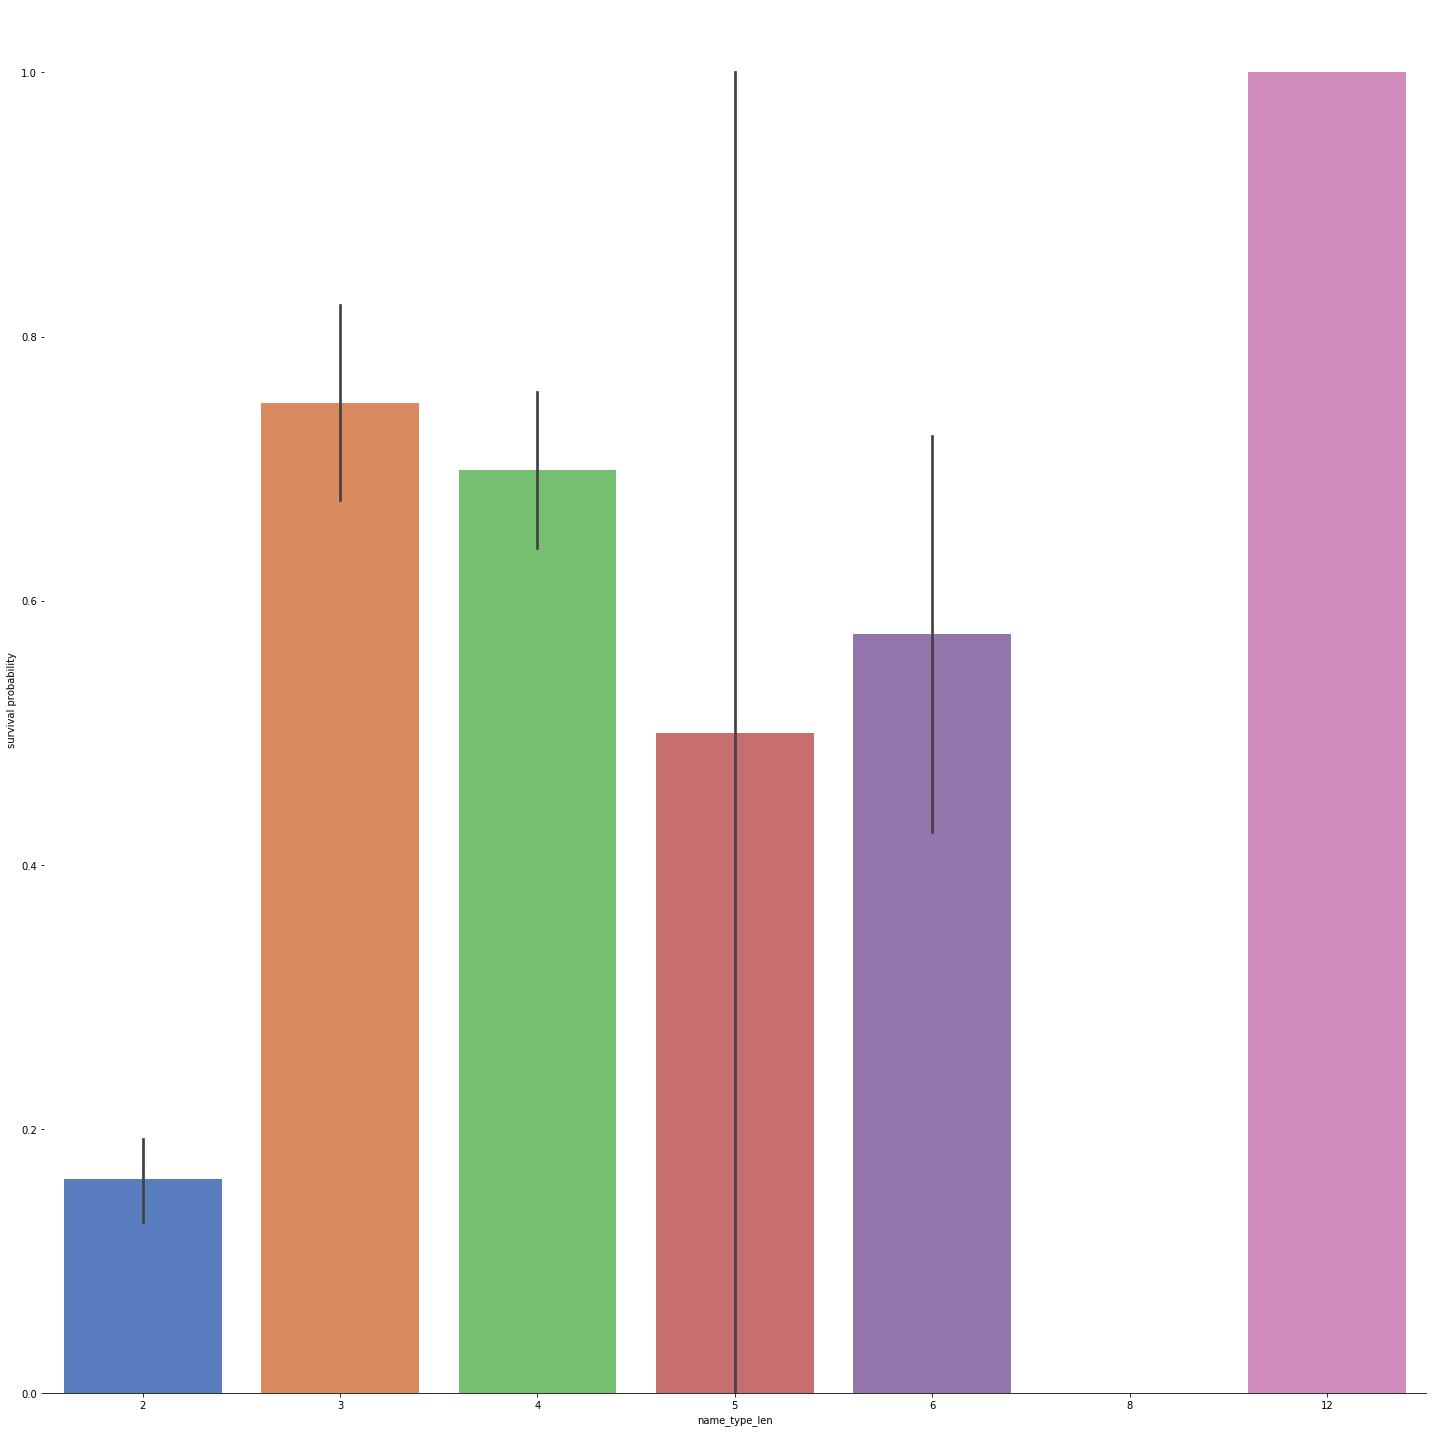

In [43]:
g = sns.factorplot(x="name_type_len", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

name_type_len=3,4 have higher chance to survive while name_type_len=2,6 have lower chance to survive

In [45]:
train.name1_len.value_counts()

6     207
7     193
5     130
8     103
4      92
9      68
10     39
11     14
3      12
13      9
12      9
14      5
16      3
15      3
22      2
20      2
Name: name1_len, dtype: int64

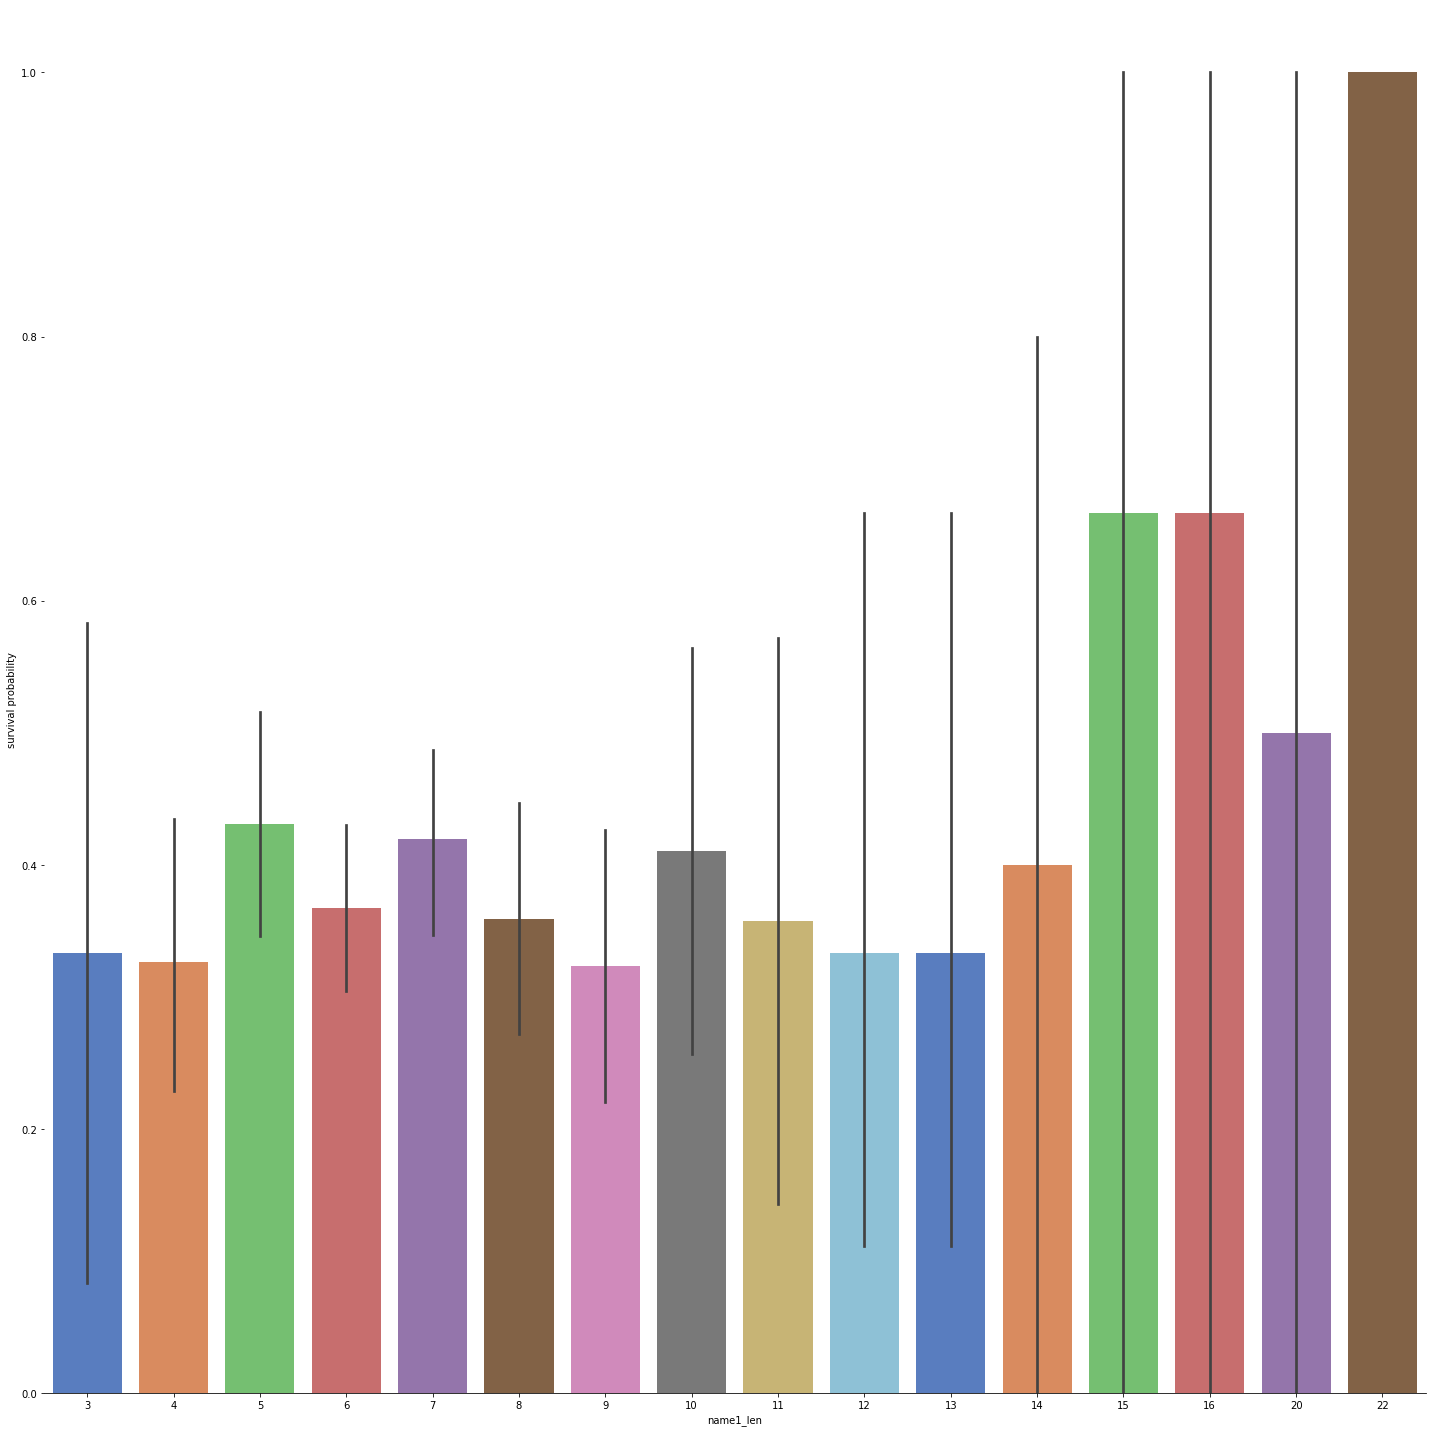

In [47]:
g = sns.factorplot(x="name1_len", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

4,6,8,9 have lower chance to survive

In [46]:
train.real_name_len.value_counts()

2    433
1    326
3    117
4     13
7      1
5      1
Name: real_name_len, dtype: int64

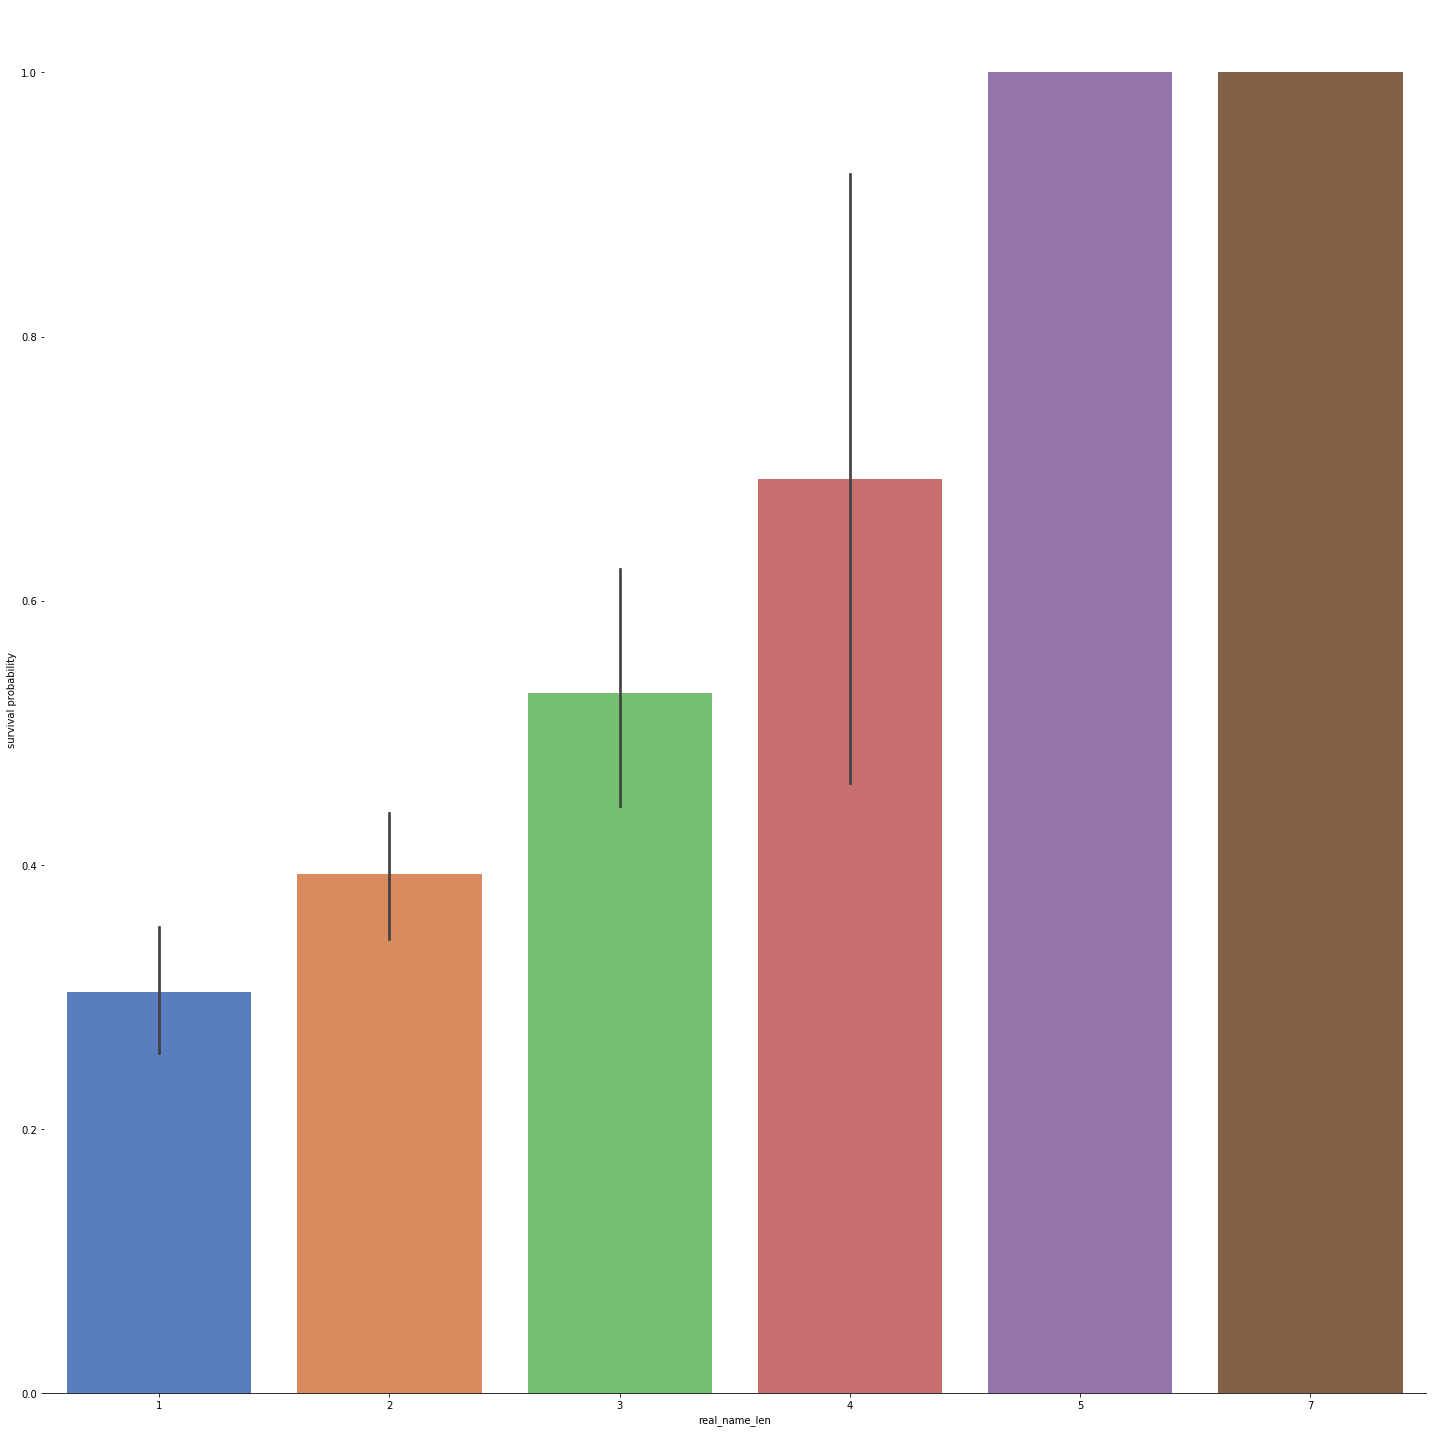

In [48]:
g = sns.factorplot(x="real_name_len", y="Survived", data=train,kind="bar", size=20, palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

1,2 have lower chance to survive

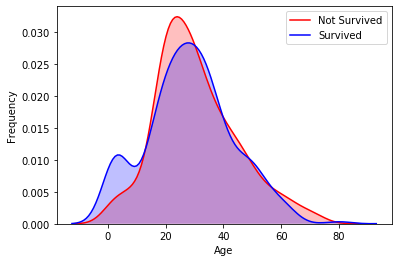

In [39]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

young age has more chance to survive

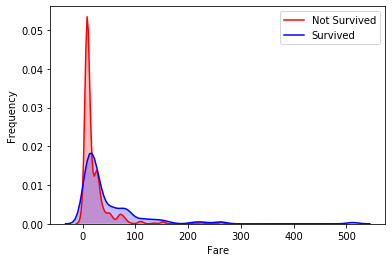

In [50]:
g = sns.kdeplot(train["Fare"][(train["Survived"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(train["Fare"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

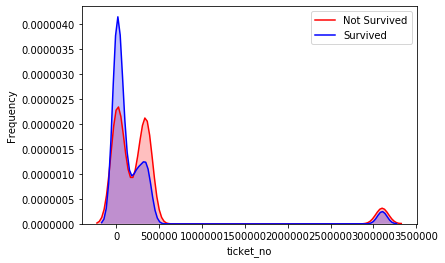

In [59]:
g = sns.kdeplot(train["ticket_no"][(train["Survived"] == 0)] , color="Red", shade=True)
g = sns.kdeplot(train["ticket_no"][(train["Survived"] == 1)], ax =g, color="Blue", shade=True)
g.set_xlabel("ticket_no")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

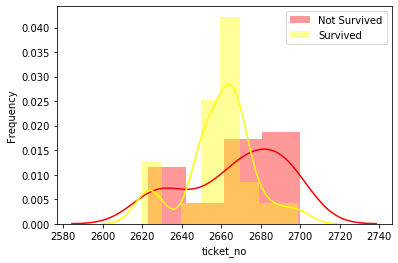

In [56]:
g = sns.distplot(train[train.ticket_no.between(2500, 2700)]["ticket_no"][(train["Survived"] == 0)] , color="Red")
g = sns.distplot(train[train.ticket_no.between(2500, 2700)]["ticket_no"][(train["Survived"] == 1)], ax =g, color="Yellow")
g.set_xlabel("ticket_no")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

ticket_no between 2650 and 2670 have higher chance to survive

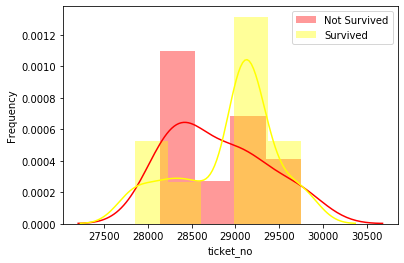

In [65]:
g = sns.distplot(train[train.ticket_no.between(27500, 30000)]["ticket_no"][(train["Survived"] == 0)] , color="Red")
g = sns.distplot(train[train.ticket_no.between(27500, 30000)]["ticket_no"][(train["Survived"] == 1)], ax =g, color="Yellow")
g.set_xlabel("ticket_no")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

ticket_no bewtween 28000 and 28500 have lower chance to survive while ticket_no between 29000 and 29500 have higher chance to survive

In [66]:
int_feats  = ['PassengerId', 'name1_len', 'name_type_len', 'name2_len', 'real_name_len',
              'ticket_no', 'Fare', 'SibSp', 'Parch']
for feat in int_feats:
    train[feat] = train[feat].astype('float64')

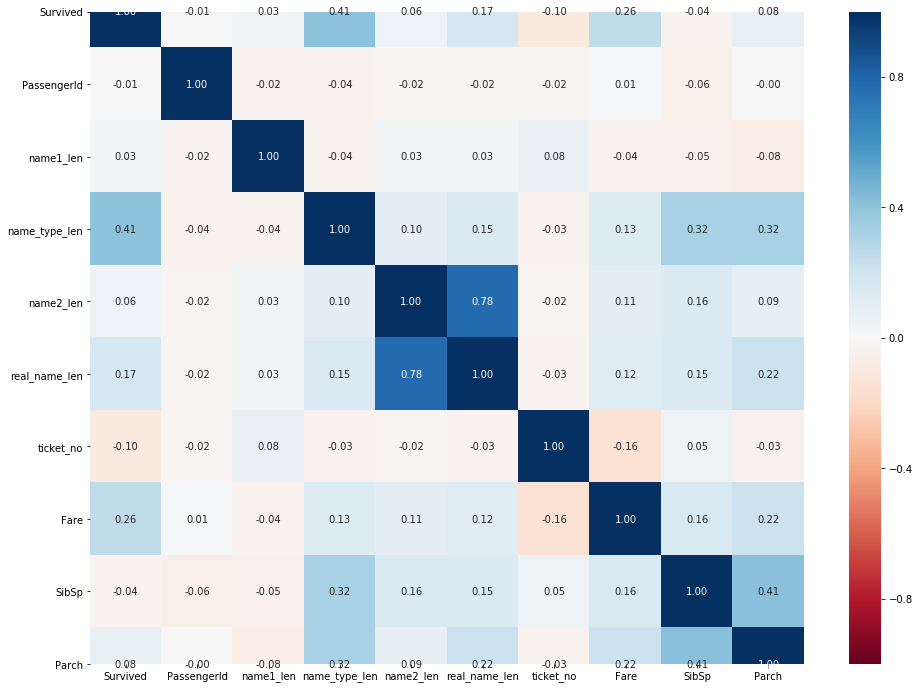

In [67]:
plt.figure(figsize=(16, 12))
df_corr = train[['Survived']+int_feats].corr()
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdBu', vmax=1, vmin=-1)
plt.show()

name_type_len has high corr with Survive and SibSp